# Prompt chaining
Prompt chaining is a technique in natural language processing where multiple prompts are sequenced together to guide a model through a complex task or reasoning process. Instead of relying on a single prompt to achieve a desired outcome, prompt chaining breaks the task into smaller, manageable steps, with each step building on the previous one. This approach can improve accuracy, coherence, and control when working with large language models.

In [28]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_groq import ChatGroq

In [29]:
class state(TypedDict):
    topic:str
    story:str
    improve:str
    final:str

In [30]:
llm=ChatGroq(model='llama-3.1-8b-instant')

In [31]:
llm.invoke('what is pyton').content

'**What is Python?**\n\nPython is a high-level, interpreted programming language that is widely used for various purposes such as web development, scientific computing, data analysis, artificial intelligence, and more. It was created in the late 1980s by Guido van Rossum and first released in 1991.\n\n**Key Features of Python:**\n\n1. **Easy to Learn**: Python has a simple syntax and is relatively easy to learn, making it a great language for beginners.\n2. **High-Level Language**: Python is a high-level language, which means it abstracts many low-level details, allowing developers to focus on the logic of their program.\n3. **Interpreted Language**: Python code is interpreted at runtime, rather than compiled beforehand, making it easier to write and test code.\n4. **Object-Oriented**: Python supports object-oriented programming (OOP) concepts such as classes, objects, inheritance, and polymorphism.\n5. **Extensive Libraries**: Python has a vast collection of libraries and frameworks t

In [32]:
def gen_story(state):
    res=llm.invoke(f"Generate a short story on topic : {state['topic']}")
    return {
        'story':res.content
    }

def check_conflict(state):
    if '?' in state['story'] or '!' in state['story']:
        return 'fail'
    return 'pass'

def imporve_story(state):
    prompt = f"This is the story improve it story :{state['story']}"
    res=llm.invoke(prompt)
    return {'improve':res.content}

def final_story(state):
    res=llm.invoke(f"now create a final short story based on this improved version {state['improve']}")
    return{
        'final':res.content
    }

In [33]:
graph=StateGraph(state)
graph.add_node('gen_story',gen_story)
graph.add_node('improve_story',imporve_story)
graph.add_node('final_story',final_story)

graph.add_edge(START,'gen_story')
graph.add_conditional_edges('gen_story',check_conflict,{'pass':'improve_story','fail':'gen_story'})
graph.add_edge('improve_story','final_story')
graph.add_edge('final_story',END)

workflow=graph.compile()


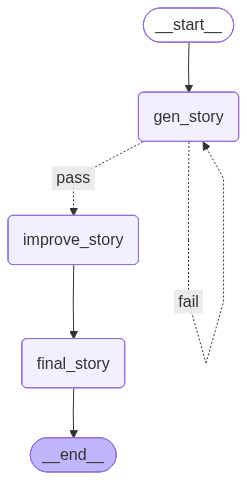

In [34]:
workflow

In [35]:
workflow.invoke({
    'topic':'Talha Prgrammer'
})

{'topic': 'Talha Prgrammer',
 'story': '**The Rise of Talha, the Programming Whiz**\n\nIn a small town in Pakistan, there lived a young boy named Talha. He was only 12 years old, but his passion for programming was unmatched. While his friends spent their days playing video games, Talha spent his evenings coding in his makeshift home lab, fueled by a burning desire to create something new and innovative.\n\nTalha\'s love for programming began when his father, an engineer, brought home an old computer for him to play with. As he tinkered with the machine, he discovered a world of endless possibilities. He spent hours watching tutorials, reading blog posts, and experimenting with code. His father, noticing his son\'s enthusiasm, encouraged him to pursue his passion.\n\nWith the help of his father, Talha set up a small programming lab in their backyard. He spent every spare moment learning new programming languages, from Python to Java. He built simple games, chatbots, and even a website 